In [1]:
!pip install wordcloud

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Load cleaned datasets
tweets = pd.read_csv("cleaned_musk_tweets.csv")
tesla = pd.read_csv("cleaned_tesla_stock.csv")
merged = pd.read_csv("merged_sentiment_stock.csv")


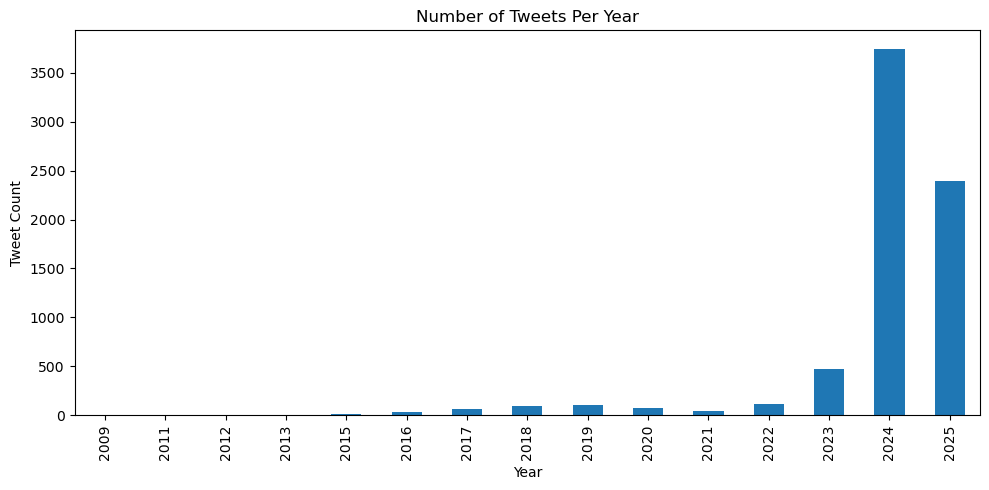

In [4]:
# Convert tweet timestamps and extract year
tweets["orig_tweet_created_at"] = pd.to_datetime(tweets["orig_tweet_created_at"])
tweets["year"] = tweets["orig_tweet_created_at"].dt.year

# Plot number of tweets per year
plt.figure(figsize=(10,5))
tweets["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Tweets Per Year")
plt.xlabel("Year")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()


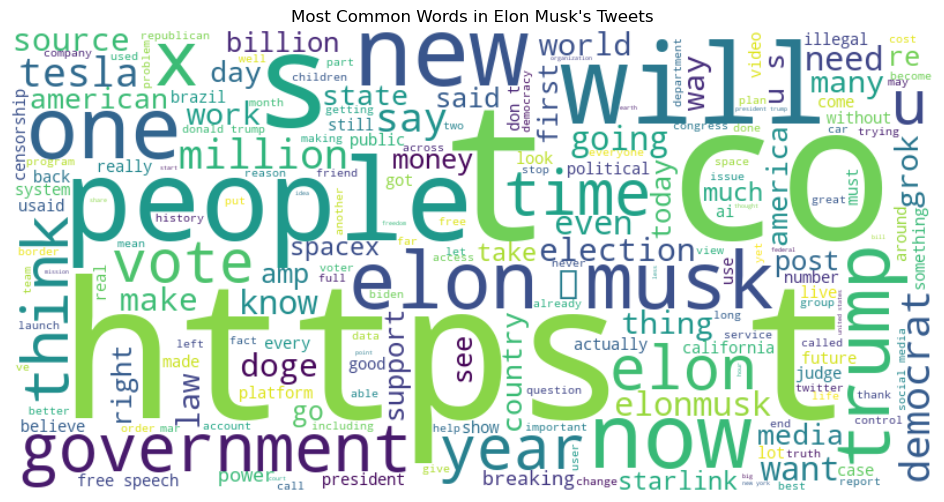

In [5]:
# Combine all tweets and generate word cloud
text = " ".join(tweets["orig_tweet_text"].dropna()).lower()
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Display word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Elon Musk's Tweets")
plt.show()


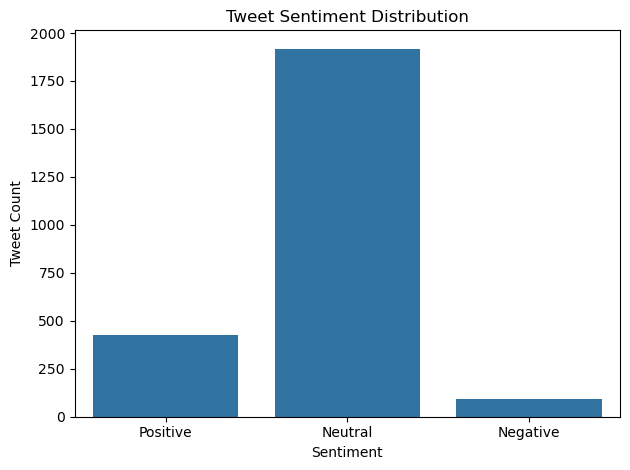

In [6]:
# Convert sentiment score to labels
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

merged["sentiment"] = merged["avg_sentiment"].apply(label_sentiment)

# Plot sentiment distribution
sns.countplot(x="sentiment", data=merged, order=["Positive", "Neutral", "Negative"])
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()


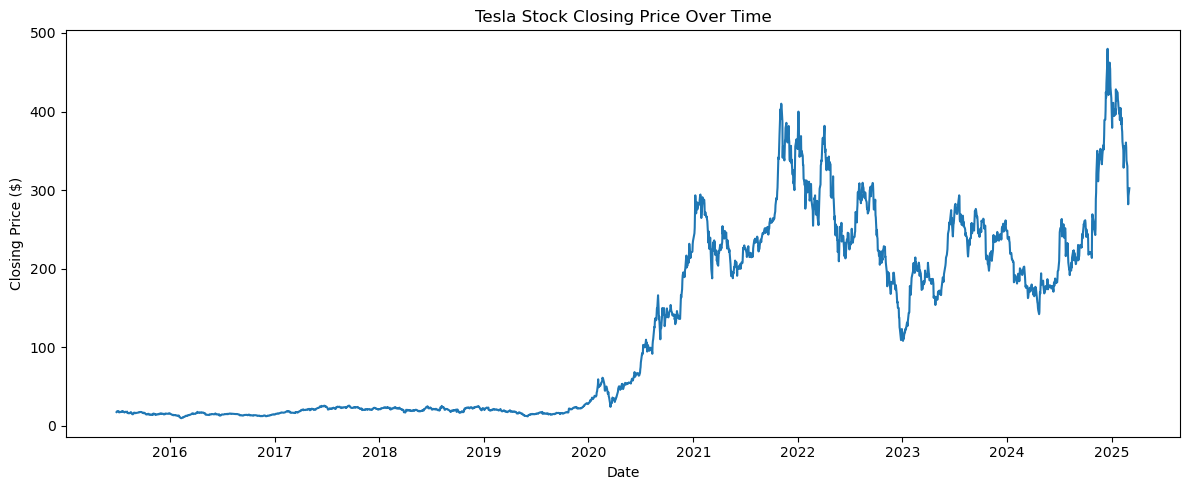

In [7]:
# Convert and sort Tesla stock dates
tesla["Date"] = pd.to_datetime(tesla["Date"])
tesla = tesla.sort_values("Date")

# Plot Tesla closing stock price
plt.figure(figsize=(12,5))
plt.plot(tesla["Date"], tesla["Close"])
plt.title("Tesla Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.tight_layout()
plt.show()


C:\Users\gvnbz\AppData\Local\Temp\ipykernel_46172\2501876537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x="sentiment", y="pct_change", order=["Positive", "Neutral", "Negative"], palette="pastel")


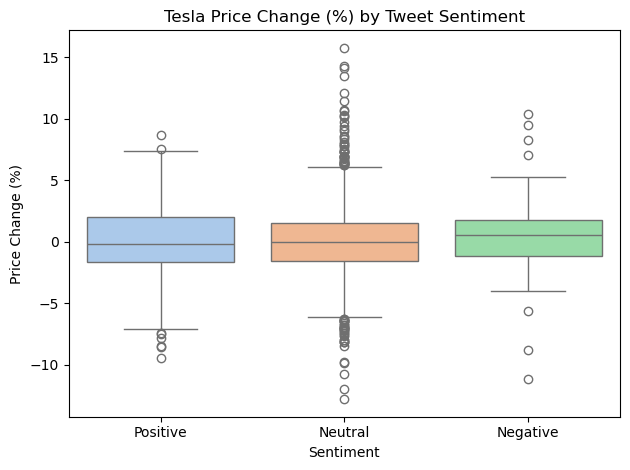

In [8]:
# Boxplot comparing price change by sentiment
sns.boxplot(data=merged, x="sentiment", y="pct_change", order=["Positive", "Neutral", "Negative"], palette="pastel")
plt.title("Tesla Price Change (%) by Tweet Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Price Change (%)")
plt.tight_layout()
plt.show()
